<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Objective is to divide n points into k clusters
# for our example, let's assume k=3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
# MATPLOTLIB => instead of using official definition, use local definition
# local def is from Google Colab, Anaconda or Jupyter or iPython 

In [0]:
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,52,45,51,52,55,53,55,61,65,66,72,22],
    'y':[39, 35, 30, 52, 55, 53, 46, 55, 59, 63,70, 66,63,58,23,14,8,19,7,24]
})

In [0]:
np.random.seed(42) # random is pseudorandom! that's why np.random instead of random.random
k = 3 # __init__(self,k=5): self.k = k; alternately command line argument! argv!
# choose random k centroids
# centroid logic, feel free to experiment with a diff logic
centroids = {
   i+1: [np.random.randint(0,80), np.random.randint(0,80)] for i in range(k)
}




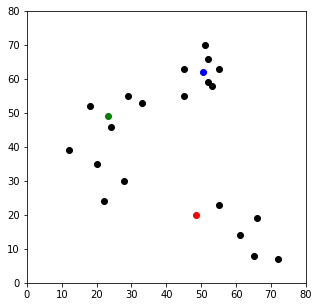

In [0]:
# plot the points and centroids, plot only during dev/test, of course not in production
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color='k')
cdic = {1:'r',2:'b',3:'g'}
for i in centroids.keys():
  plt.scatter(*centroids[i],color=cdic[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [0]:
def doWork(df, centroids):
  for i in centroids.keys():
    #SQUARED ROOT DISTANCE
    df['distance_from_{}'.format(i)] = (np.sqrt((df['x']-centroids[i][0])**2 +(df['y']-centroids[i][1])**2 ))
  centroid_dis_cols = ['distance_from_{}'.format(i) for i in centroids.keys()] # list of col names that we need
  df['closest'] = df.loc[:,centroid_dis_cols].idxmin(axis=1) # axis control dimension of data, this means, create new col
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: cdic[x])
  return df

# 1)distance_from_1 : 25, distance_from_2:45, distance_from_3: 15
# 2)closest: "distance_from_3"
# 3)closest: 3
# 4)color: g

In [0]:
df_modified = doWork(df, centroids)
df_modified.head()

,x,y,distance_from_1,closest,color,distance_from_2,distance_from_3
0,12,39,41.260037,3,g,44.785657,15.014660
1,20,35,32.317033,3,g,40.680437,14.361058
2,28,30,22.921401,3,g,39.077370,19.596939
3,18,52,44.293235,3,g,33.935413,6.003332
4,29,55,40.126558,3,g,22.542930,8.345058


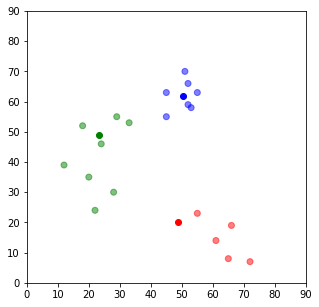

In [0]:
plt.figure(figsize=(5,5))
plt.scatter(df_modified['x'],df_modified['y'],color=df_modified['color'], alpha=0.5)
for i in centroids.keys():
  plt.scatter(*centroids[i],color=cdic[i])
plt.xlim(0,90)
plt.ylim(0,90)
plt.show()


In [0]:
import copy
old_centroids = copy.deepcopy(centroids)
# Update here to create your own logic to update centroids
def newCentroids(df,k):
  centroids_new = centroids
  for i in centroids.keys():
    centroids_new[i][0] = np.mean(df[df['closest']== i]['x'])
    centroids_new[i][1] = np.mean(df[df['closest']== i]['y'])
  return centroids_new

centroids_new = newCentroids(df_modified, k)
centroids_new

{1: [63.8, 14.2], 2: [50.42857142857143, 62.0], 3: [23.25, 41.75]}

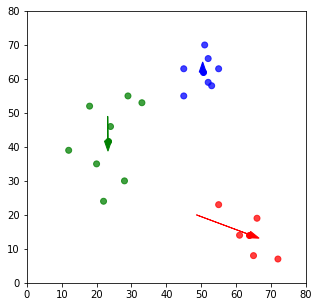

In [0]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df_modified['x'],df_modified['y'],color=df_modified['color'],alpha=0.75)
for i in centroids_new.keys():
  plt.scatter(*centroids[i], color=cdic[i])
plt.xlim(0,80)
plt.ylim(0,80)
#plt.show()
# difference between our old and new centroids
for i in old_centroids.keys():
  oldx = old_centroids[i][0]
  oldy = old_centroids[i][1]
  dx = (centroids_new[i][0]-old_centroids[i][0])
  dy = (centroids_new[i][1]-old_centroids[i][1])
  ax.arrow(oldx,oldy,dx,dy,head_width=2,head_length=3,fc=cdic[i],ec=cdic[i])
plt.show()


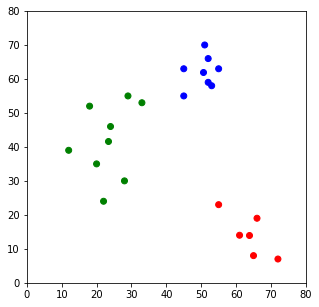

In [0]:
df_new = doWork(df_modified, centroids_new)
fig = plt.figure(figsize=(5,5))
plt.scatter(df_new['x'],df_new['y'],color=df_new['color'])
for i in centroids.keys():
  plt.scatter(*centroids[i], color=cdic[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

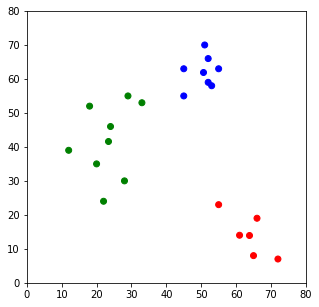

In [0]:
while True:
  closest_centroids = df_new['closest'].copy(deep=True)
  centroids = newCentroids(df_new,centroids)
  df_new = doWork(df_new, centroids)
  # write the logic to compare which clustering is better
  if closest_centroids.equals(df['closest']):
    break

fig = plt.figure(figsize=(5,5))
plt.scatter(df_new['x'],df_new['y'],color=df_new['color'])
for i in centroids.keys():
  plt.scatter(*centroids[i], color=cdic[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


In [0]:
class PandaKMeans:
  def __init__(this,k=5):
    this.k = k
  def fit(this,df): # no trainx,trainy because this is clustering and we don't have a y!
    this.df_new = doWork(df,)
  def doWork(this,df, centroids):
  for i in centroids.keys():
    #SQUARED ROOT DISTANCE
    df['distance_from_{}'.format(i)] = (np.sqrt((df['x']-centroids[i][0])**2 +(df['y']-centroids[i][1])**2 ))
  centroid_dis_cols = ['distance_from_{}'.format(i) for i in centroids.keys()] # list of col names that we need
  df['closest'] = df.loc[:,centroid_dis_cols].idxmin(axis=1) # axis control dimension of data, this means, create new col
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: cdic[x])
  return df 